In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy import stats

In [14]:
# Завантаження даних
df = pd.read_excel("lab2_data.xlsx")

In [15]:
# Видалення непотрібних стовпців
columns_to_drop = [
    "Total users", "Sessions", "Sessions per user", 
    "1-day active users", "Views per session", 
    "Average session duration", "Bounce Rate"
]
df = df.drop(columns=columns_to_drop)

In [16]:
print(df.head())

        Date  New users  Views  Engaged sessions
0 2023-02-06        257    816               213
1 2023-02-05        261    705               209
2 2023-02-04        219    532               140
3 2023-02-03        335    924               286
4 2023-02-02        339   1114               313


In [17]:
# Перетворення дати у формат datetime
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)


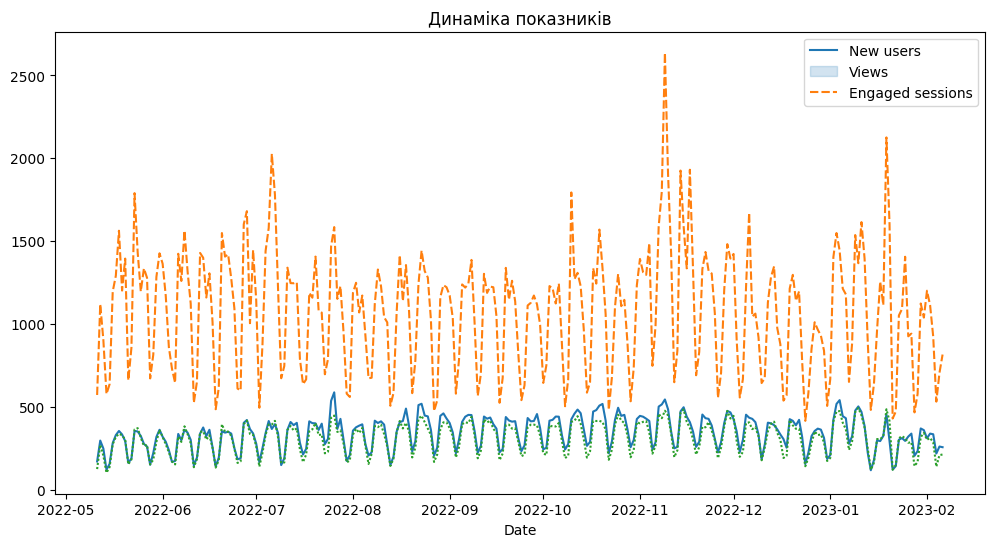

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df)
plt.title("Динаміка показників")
plt.legend(df.columns)
plt.show()

In [19]:
# Виявлення аномалій методом Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["anomaly_if"] = iso_forest.fit_predict(df)


In [20]:
# Виявлення аномалій методом Z-Score
z_scores = np.abs(stats.zscore(df.drop(columns=["anomaly_if"])))
df["anomaly_z"] = (z_scores > 3).any(axis=1).astype(int)

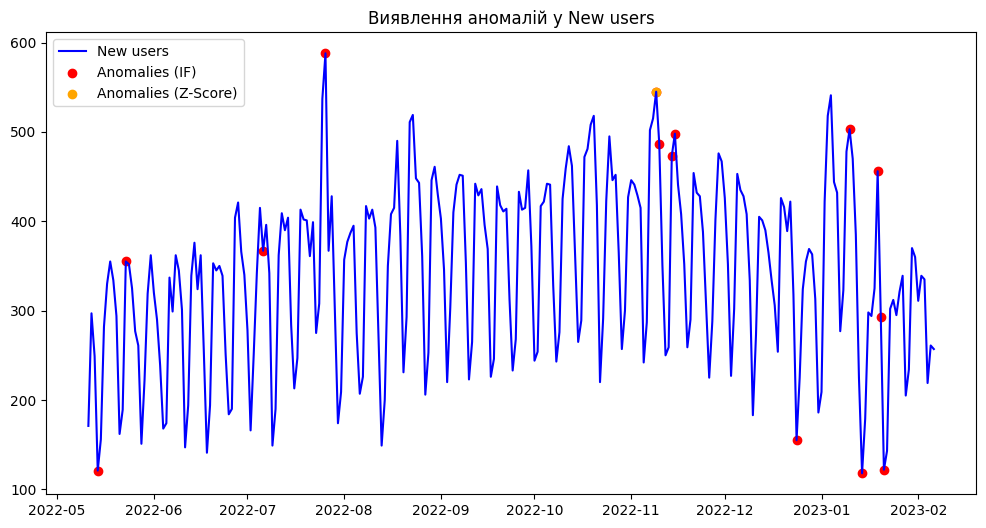

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["New users"], label="New users", color="blue")
plt.scatter(df.index[df["anomaly_if"] == -1], df["New users"][df["anomaly_if"] == -1], color="red", label="Anomalies (IF)")
plt.scatter(df.index[df["anomaly_z"] == 1], df["New users"][df["anomaly_z"] == 1], color="orange", label="Anomalies (Z-Score)")
plt.legend()
plt.title("Виявлення аномалій у New users")
plt.show()

In [22]:
# Виведення аномальних записів
anomalies = df[(df["anomaly_if"] == -1) | (df["anomaly_z"] == 1)]
anomalies

,New users,Views,Engaged sessions,anomaly_if,anomaly_z
Date,,,,,
2023-01-21,122,430,121,-1,0
2023-01-20,293,1602,414,-1,0
2023-01-19,456,2126,486,-1,0
2023-01-14,118,482,121,-1,0
2023-01-10,503,1367,493,-1,0
2022-12-24,155,416,142,-1,0
2022-11-15,498,1590,484,-1,0
2022-11-14,473,1926,465,-1,0
2022-11-10,486,1907,448,-1,0
